In [9]:
from pycalphad import Database, Model, variables as v
from pycalphad import equilibrium
import numpy as np

In [10]:
from pycalphad.tests.datasets import *
dbf = Database(ALFE_TDB)

build_callables [P, T]
build_callables [P, T]


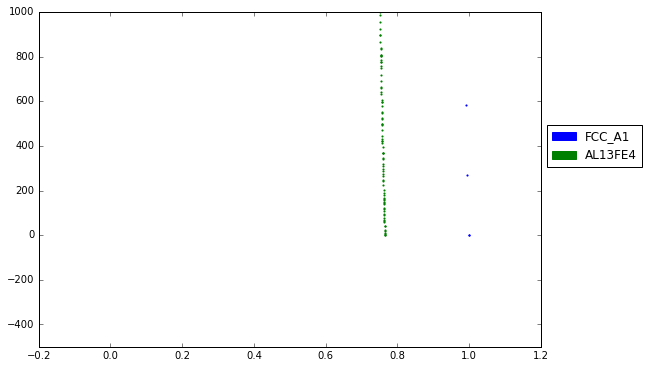

In [15]:
%matplotlib inline
from pycalphad import calculate, Database
from pycalphad.plot.utils import phase_legend
import numpy as np
from pycalphad.tests.datasets import ISSUE43_TDB
import matplotlib.pyplot as plt

my_phases = ['FCC_A1', 'AL13FE4']

legend_handles, colorlist = phase_legend(my_phases)

fig = plt.figure(figsize=(9,6))
ax = fig.gca()
for name in my_phases:
    result = calculate(dbf, ['AL', 'FE', 'VA'], name,
                     T=300, P=101325, pdens=100)
    gm = result.GM.isel(T=0,P=0) - np.sum([-8490.14017021, -123111.773] * result.X.isel(T=0,P=0), axis=1)
    ax.scatter(result.X.isel(T=0,P=0).sel(component='AL'), gm,
               marker='.', s=5, color=colorlist[name.upper()])
#ax.set_xlim((0.6, 1))
ax.set_ylim((-500, 1000))
#plt.plot([0,1], [0, 0])
ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))
plt.show()

In [8]:
gm.argmin()

<xarray.DataArray ()>
array(501)
Coordinates:
    T          float64 1.273e+03
    P          float64 1.013e+05
    component  <U1 'A'